In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import rotate
from scipy.interpolate import interp1d
import pickle
%load_ext autoreload
%autoreload 2
import matplotlib.colors as mcolors
import os
import pandas as pd

In [2]:
mcolors.TABLEAU_COLORS[list(mcolors.TABLEAU_COLORS.keys())[0]]
#white reference
white_alignment = {
    'file' : 'alignment.bmp',
    'rotate' : 1.0,
    'x0' : 511,
    'y0' : 369,
    'step' : 7.287 * 3,
    'xmax' : 1360,
    'xmin' : 100,
    'ymax' : 1150,
    'ymin' : 65
}
#fake
fake_alignment = {
    'file' : 'fake1.bmp',
    'rotate' : 0.0,
    'x0' : 512,
    'y0' : 393,
    'step' : 7.287 * 3,
    'xmax' : 1360,
    'xmin' : 100,
    'ymax' : 1155,
    'ymin' : 65
}
#real
file = 'real.bmp'
real_alignment = {
    'file' : 'real.bmp',
    'rotate' : 0.0,
    'x0' : 512,
    'y0' : 394,
    'step' : 7.287 * 3,
    'xmax' : 1360,
    'xmin' : 100,
    'ymax' : 1155,
    'ymin' : 68
}

def show(img, wx=300, wy=300, center=(600,475)):
    plt.imshow(img, cmap='hot')
    plt.xlim(center[0] - wx//2, center[0] + wx//2)
    plt.ylim(center[1] - wy//2, center[1] + wy//2)
    plt.axvline(center[0])
    plt.axhline(center[1])
    
def crop(img, wx = 100, wy=100, center = None):
    if center is None:
        center = img.shape[0] // 2, img.shape[1] // 2
    return img[center[0] - wx//2:center[0] + wx//2, center[1] - wy//2:center[1] + wy//2]

In [4]:
img_dir ='/home/makam0a/Dropbox/Pixeltra/Fabrication/Video/'
file ='white_end.tiff'
img = io.imread(img_dir + file)
plt.figure(figsize=[20,20])
plt.imshow(crop(img, 1700, 1700, (1320,1940)))
plt.show()

NameError: name 'crop' is not defined

<Figure size 1440x1440 with 0 Axes>

In [4]:
img = crop(img, 1700, 1700, (1320,1940))
wx, wy = img.shape
print(wx, wy)

1700 1700


/home/makam0a/Dropbox/projects/camera/src/utils.py:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


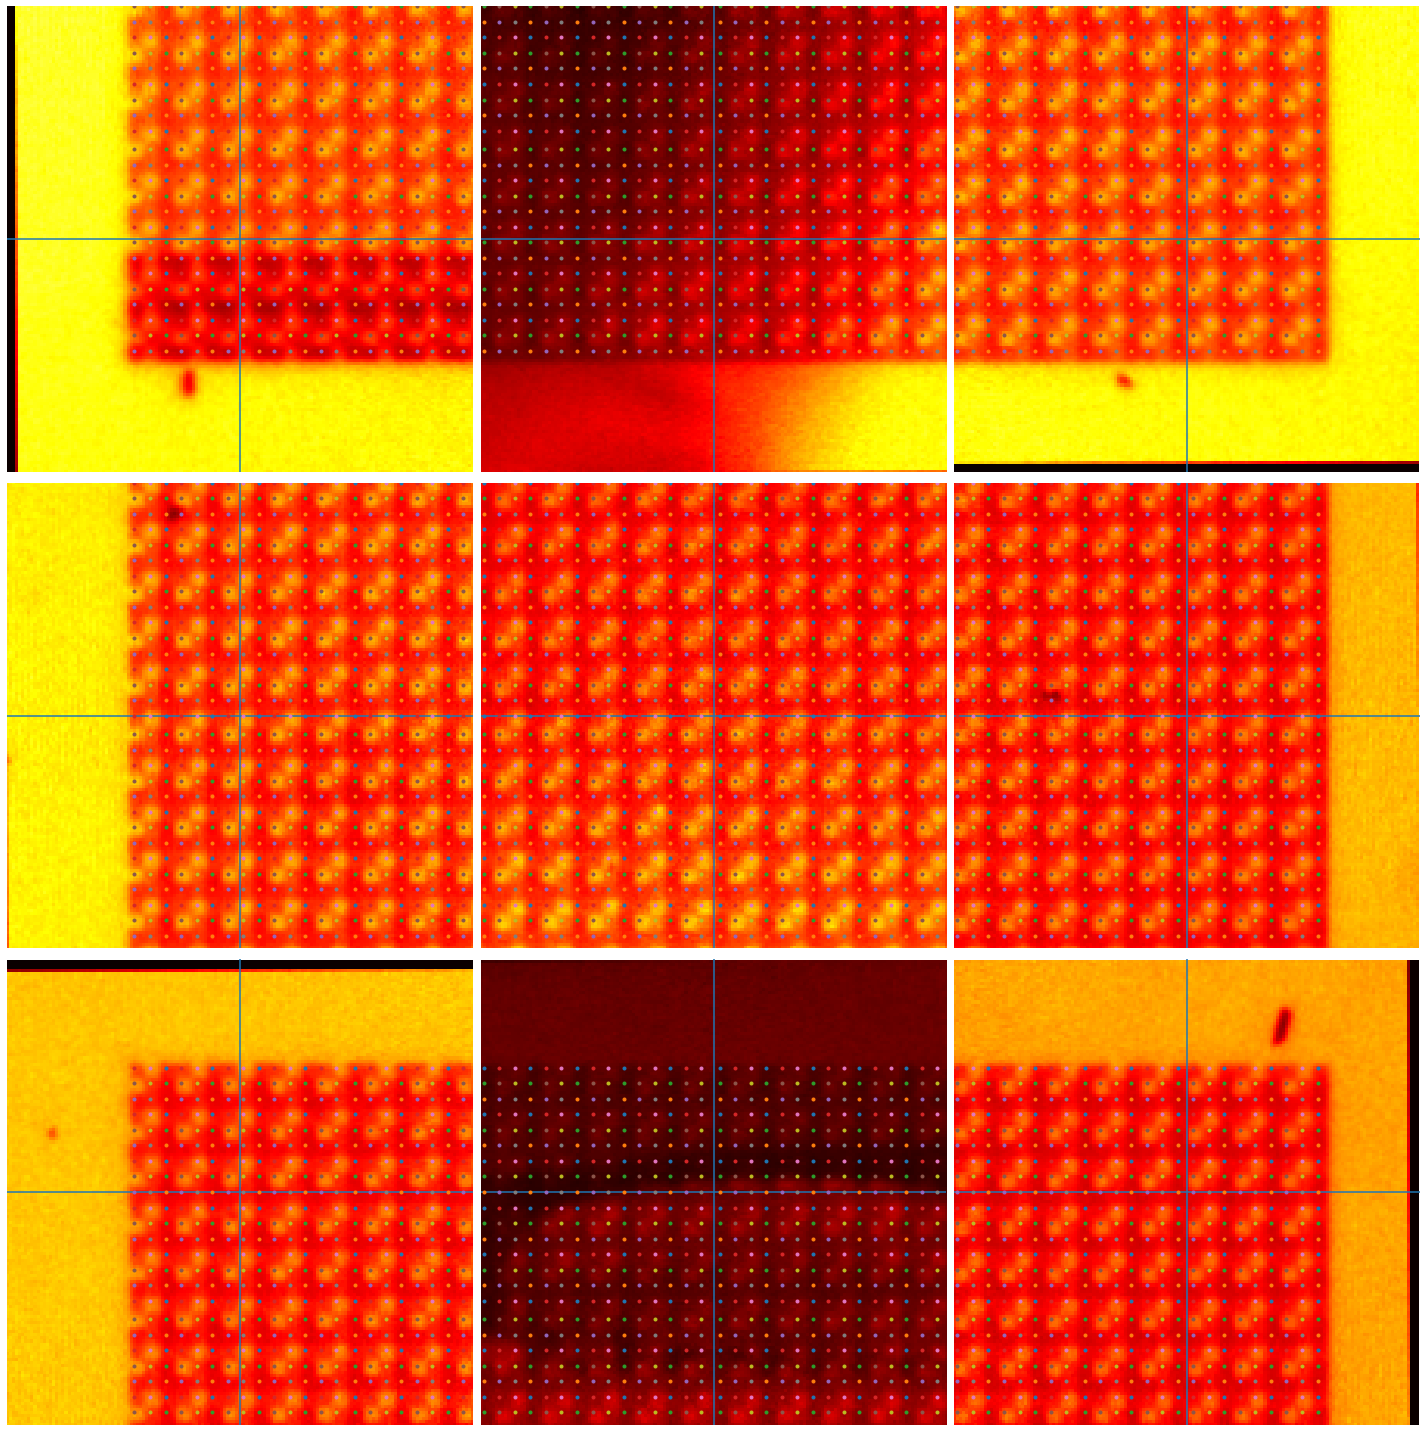

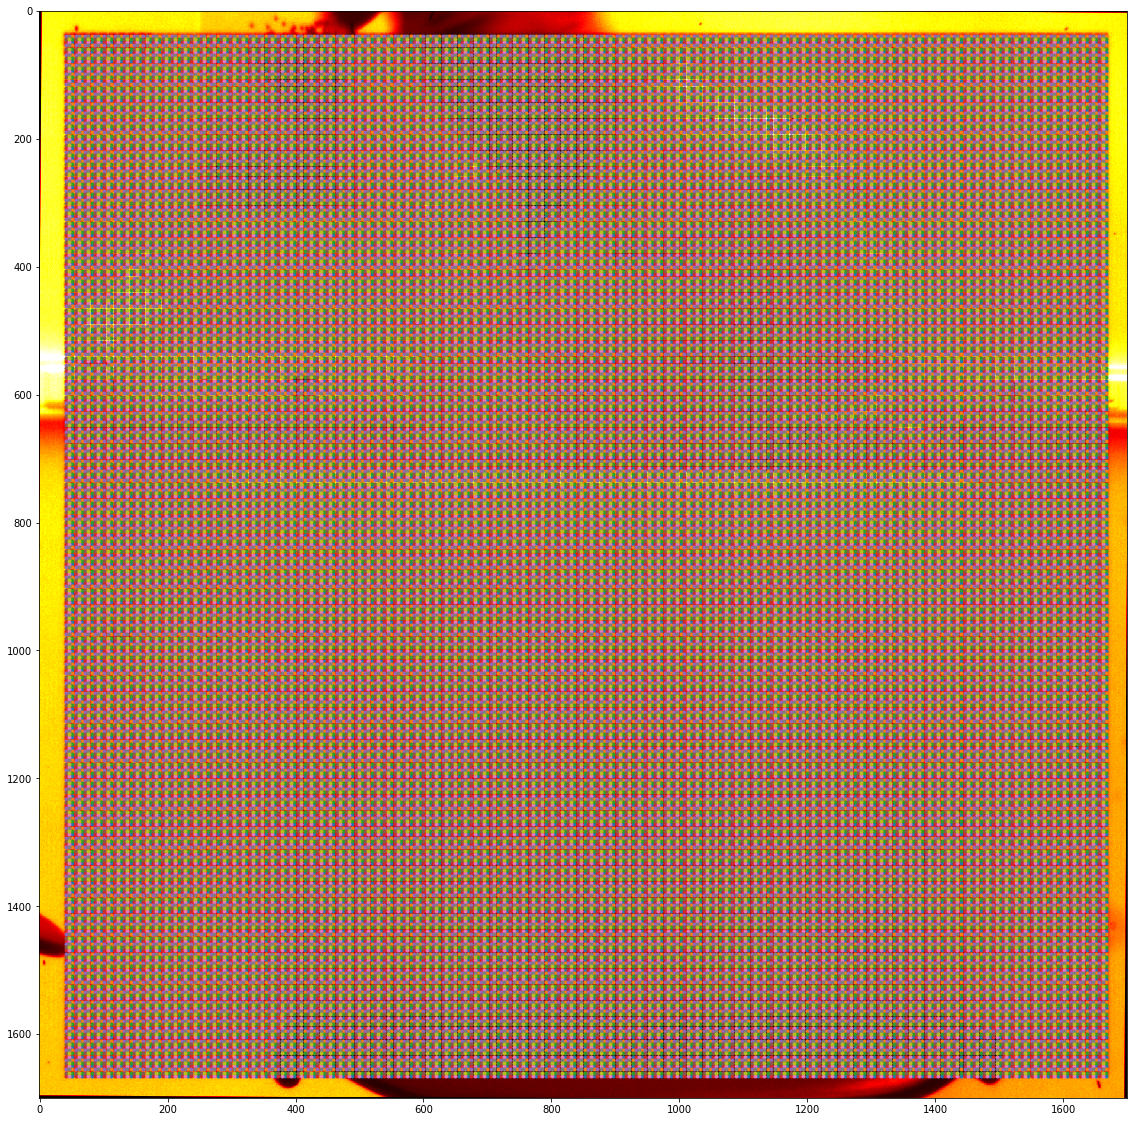

In [5]:
file = 'white_end.tiff'
real_alignment = {
    'file' : 'white_end.tiff',
    'rotate' : -0.25,
    'x0' : 36,
    'y0' : 34,
    'step' : 5.034 * 3,
    'xmax' : 1670,
    'xmin' : 36,
    'ymax' : 1670,
    'ymin' : 34
}


from src.utils import Camera
cam = Camera(alignment=real_alignment)
cam.show_alignment(img, wx=150, wy=150)

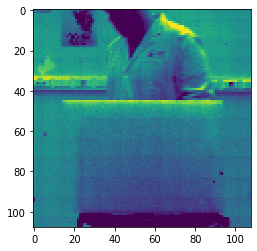

In [28]:
file ='white_end.tiff'
img = io.imread(img_dir + file)
img = crop(img, 1700, 1700, (1320,1940))
cam = Camera(alignment=real_alignment, nx=108, ny=108)
arr = cam.transform(img)
plt.imshow(arr[:,:,5], vmax=1.0, vmin=0.2)
plt.show()

In [29]:
import numpy as np
import cv2 as cv
file = 'video0001.avi'
channel = 2
alignment = fake_alignment
cap = cv.VideoCapture(img_dir + file)
ret, frame = cap.read()
frames = []
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = crop(cv.cvtColor(frame, cv.COLOR_BGR2GRAY), 1700, 1700, (1320,1940))
    gray = cam.transform(gray)
#     if i == 0:
#         i+=1
#         print('file saved')
#         io.imsave(img_dir + file[:-4]+'.bmp', gray)
    #gray = transform_image(gray, alignment)
    frames.append(gray)
    #img = cv.resize(gray[...,channel], (56*8, 48*8)) 
    cv.imshow('frame', gray[...,channel])
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
#np.save(video_folder + file[:-4] + '.npy', np.stack(frames, axis=0))

Can't receive frame (stream end?). Exiting ...


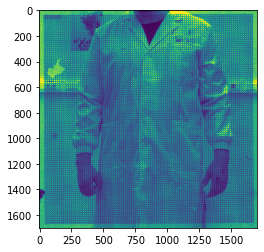

In [17]:
plt.imshow(crop(frames[0], 1700, 1700, (1320,1940)))
plt.show()

In [31]:
np.save(img_dir + 'channels.npy', frames)

In [33]:
frames[0].shape

(108, 108, 9)

In [42]:
cap = cv.VideoCapture(0)
wx, wy, _ = frames[0].shape
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
channel = 4
out = cv.VideoWriter(img_dir + 'video-channel-' + str(channel) + '.avi', fourcc, 30.0, (wx*5,wy*5),0)
for frame in frames:
    frame = cv.resize(frame[...,channel], (wx*5,wy*5)) 
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    frame = np.uint8(255*frame)
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
out.release()
cv.destroyAllWindows()

In [36]:
out.release()
cv.destroyAllWindows()

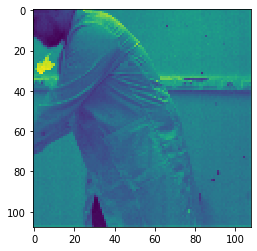

In [183]:
plt.imshow(frames[0:40][49][...,0])
plt.show()

In [186]:
key_frames = frames[200::230]
key_frames.__len__()
i=0

40

In [212]:
for frame in key_frames:
    frame = cv.resize(frame[...,0], (wx*5,wy*5)) 
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    filename = img_dir + 'skimage/' + 'frame-{}.jpg'.format(i)
    frame = np.uint8(255*frame)
    io.imsave(filename, frame)
    i+=1

In [250]:
background = os.listdir(img_dir + 'background/')
mask = os.listdir(img_dir + 'mask/')

In [251]:
data = pd.DataFrame(np.array([mask, len(mask)*['mask/']]).T, columns=['file', 'folder'])
data = data.append(pd.DataFrame(np.array([background, len(background)*['background/']]).T, columns=['file', 'folder']),ignore_index=True)

In [253]:
data.to_csv('andrea_data.csv')
pd.read_csv('andrea_data.csv', index_col=0)

,file,folder
0,frame-68.png,mask/
1,frame-51.png,mask/
2,frame-37.png,mask/
3,frame-77.png,mask/
4,frame-15.png,mask/
...,...,...
87,frame-191.jpg,background/
88,frame-193.jpg,background/
89,frame-208.jpg,background/
90,frame-182.jpg,background/


In [214]:
io.imread(img_dir + 'skimage/' + 'frame-{}.jpg'.format(252))

array([[ 27,  27,  27, ..., 118, 118, 118],
       [ 27,  27,  27, ..., 118, 118, 118],
       [ 27,  27,  27, ..., 118, 118, 118],
       ...,
       [113, 113, 113, ..., 114, 114, 114],
       [115, 115, 116, ..., 116, 116, 116],
       [116, 116, 116, ..., 117, 117, 117]], dtype=uint8)

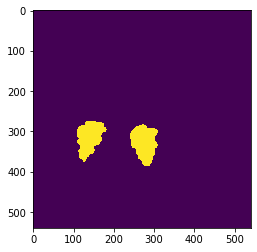

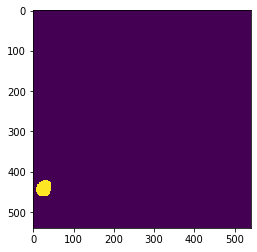

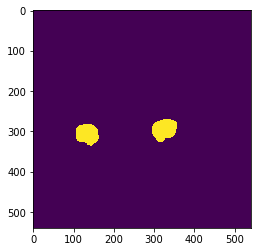

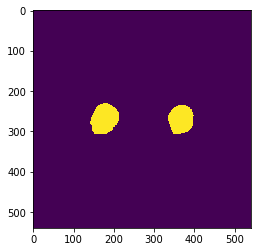

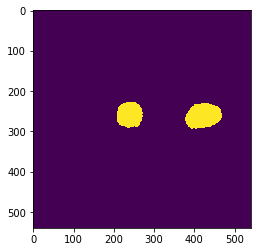

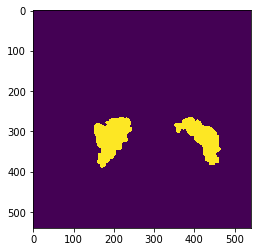

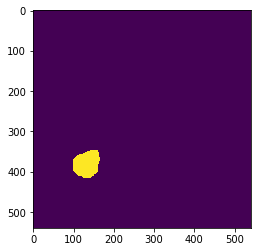

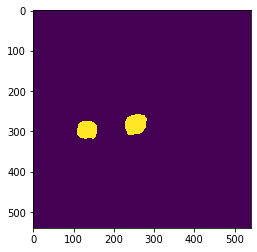

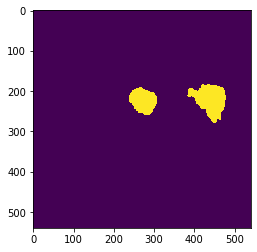

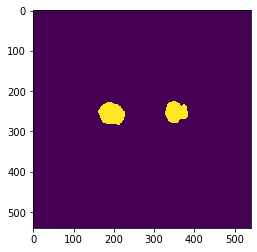

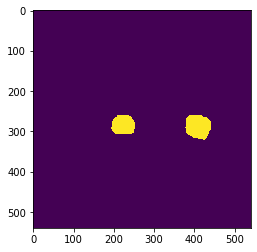

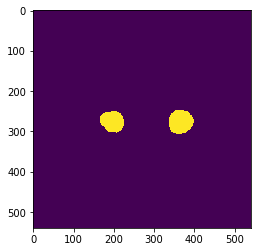

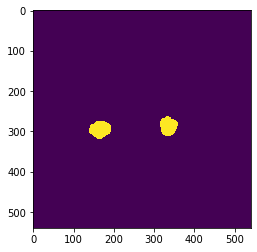

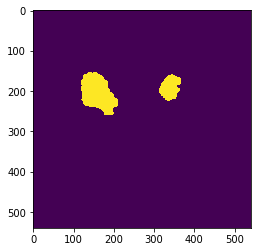

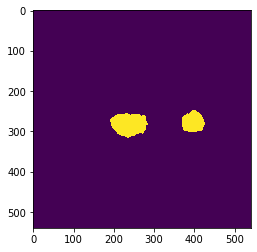

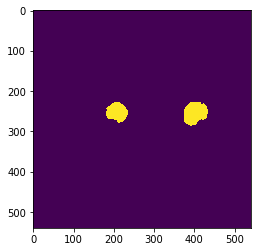

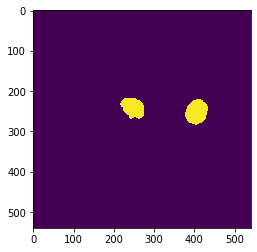

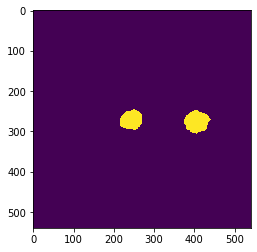

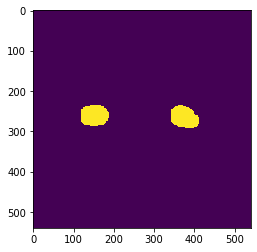

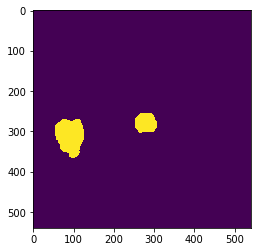

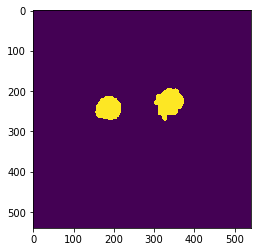

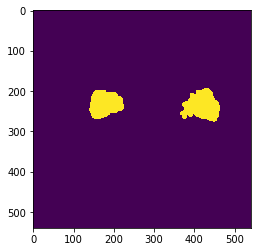

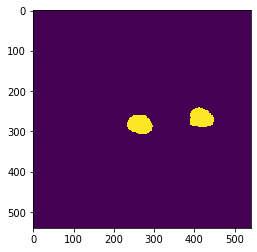

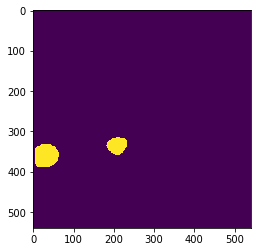

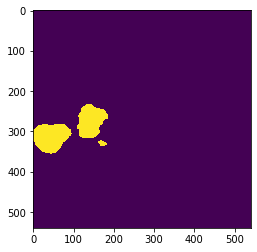

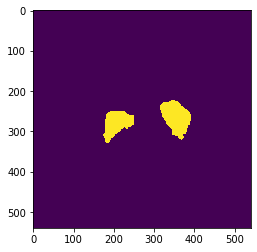

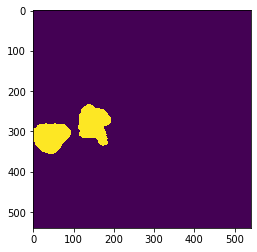

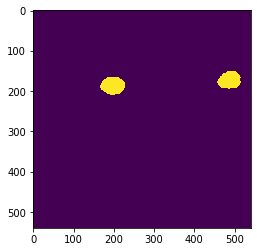

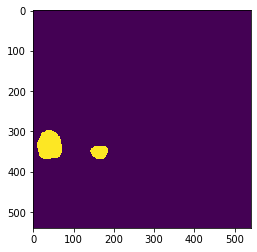

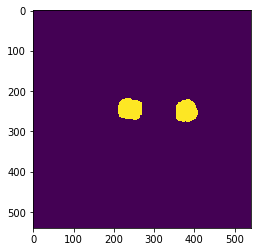

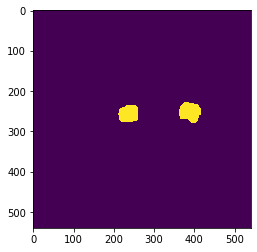

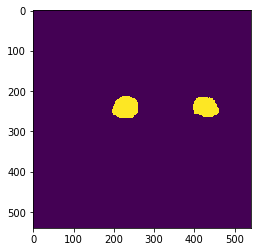

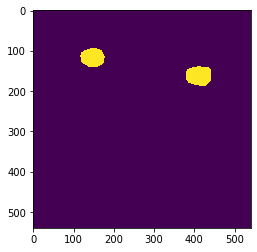

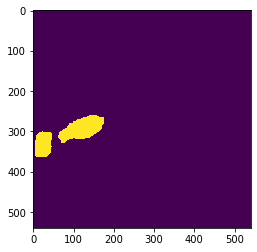

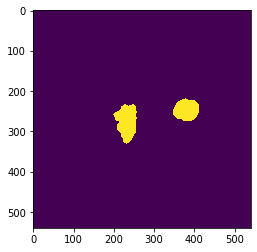

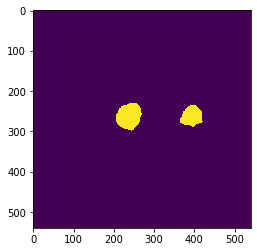

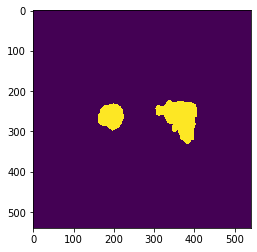

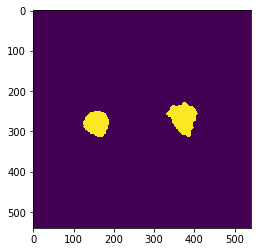

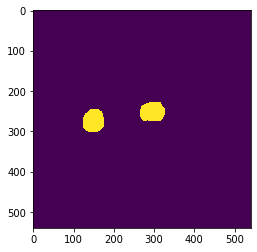

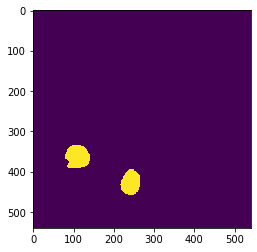

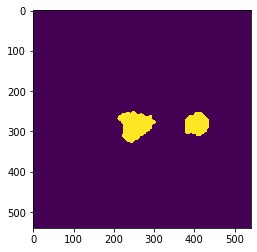

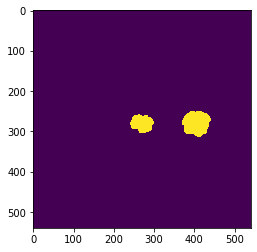

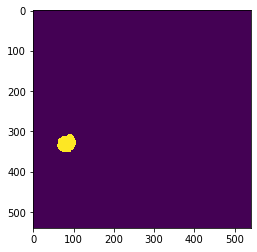

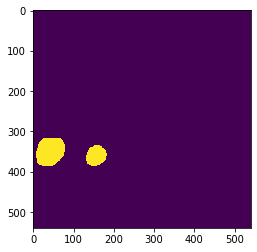

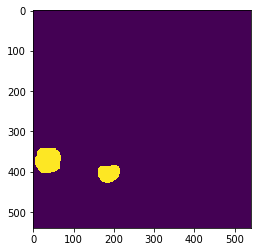

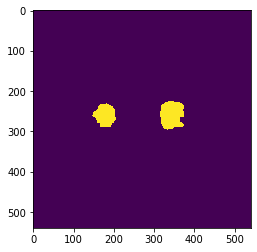

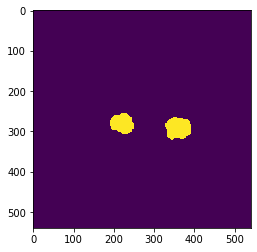

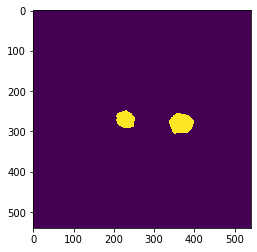

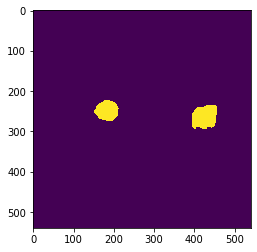

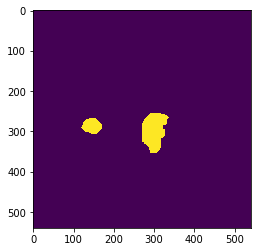

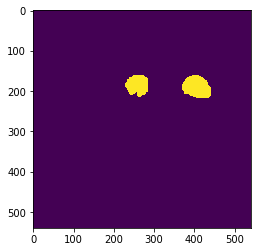

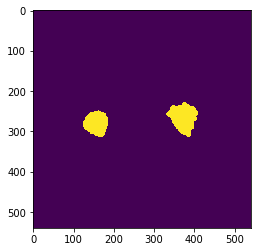

In [248]:
for file in mask:
    filename = img_dir + 'mask/' + file
    img = io.imread(filename, as_gray=True)
    img[img==1] = 0
    img[img>0] = 1
    plt.imshow(img)
    plt.show()

In [31]:
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(img_dir + 'segmented_video/' + 'segmentations_opencv'+'.avi', fourcc, 30.0, (512,512),0)
for i in range(2132):
    frame = io.imread(img_dir + 'annotated_pred/' + 'frame-{}.jpg'.format(i))
    wx, wy, _ = frame.shape
    if wy != 260:
        frame = frame[:, wy-260:,:]
    wx, wy, _ = frame.shape
    if wy != 260:
        print('something wrong')
    if wx != 260:
        print('something wrong')
    #frame = cv.cvtColor(frame,cv.COLOR_RGB2BGR)
    frame = cv.resize(frame, (512,512)) 
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished

out.release()
cv.destroyAllWindows()

In [32]:
frames = []
for i in range(2132):
    frame = io.imread(img_dir + 'annotated_pred/' + 'frame-{}.jpg'.format(i))
    wx, wy, _ = frame.shape
    if wy != 260:
        frame = frame[:, wy-260:,:]
    frame = cv.resize(frame, (512,512)) 
    frames.append(frame)

#imageio.mimsave(img_dir + 'segmented_video/' + 'segmentations'+'.avi', frames)

In [42]:
imageio.mimsave(img_dir + 'segmented_video/' + 'segmentations_bigger'+'.webm', frames, fps=30)

ValueError: Could not find a format to write the specified file in multi-image mode

In [35]:
import imageio
imageio.mimsave(img_dir + 'segmented_video/' + 'segmentations_faster'+'.gif', frames, fps=30)

In [26]:
imageio.mimsave?

In [260]:
cv.imread(img_dir + 'annotated_pred/' + 'frame-{}.jpg'.format(60)).shape

(260, 260, 3)

In [36]:
imageio.mimsave?